In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from pandas.api.types import is_numeric_dtype

### 0. Wczytanie danych i EDA

In [2]:
df = pd.read_table('USCensus1990.data.txt', sep=',')

In [111]:
#usuwanie pierwszej kolumny, gdyz zgodnie z intrukcja jest ona zbedna
df = df.drop('caseid', axis=1)

In [112]:
df_train, df_test = train_test_split(df, test_size=0.1)
df_train, df_val = train_test_split(df_train, test_size=0.2*0.9) # 20% całego zbioru

In [113]:
df_train

,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,iEnglish,...,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
387050,-1.413337,-0.321442,-0.520394,-0.179965,-0.298017,-0.724331,-0.791948,-1.696245,-1.730976,-0.3332,...,-0.606522,-0.754486,-0.187674,-0.966897,-1.462637,-1.472413,-0.199956,-2.083369,-0.863294,-0.365204
2219454,0.066737,-0.816348,-0.520394,-0.179965,-0.298017,-0.124777,0.911708,0.672683,0.632357,-0.3332,...,-0.606522,1.788370,-0.187674,1.360113,-0.001049,-0.127801,-0.199956,0.636255,-0.389111,2.738194
251588,1.546811,-0.568895,-0.520394,-0.179965,-0.298017,-0.724331,-0.791948,-0.511781,-0.549309,-0.3332,...,-0.606522,-0.754486,-0.187674,-0.966897,1.460540,1.216811,-0.199956,0.389016,1.981807,-0.365204
396664,-1.413337,-0.568895,-0.520394,-0.179965,-0.298017,-0.724331,-0.791948,-1.696245,-1.730976,-0.3332,...,-0.606522,-0.754486,-0.187674,-0.966897,-1.462637,-1.472413,-0.199956,-1.094415,-0.863294,-0.365204
2396505,0.560095,-0.568895,-0.520394,-0.179965,-0.298017,-0.124777,0.911708,0.672683,0.632357,-0.3332,...,-0.606522,-0.245915,-0.187674,-0.966897,1.460540,-0.127801,-0.199956,0.636255,-0.389111,-0.365204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193068,0.066737,-0.568895,0.744953,-0.179965,-0.298017,-0.124777,0.343823,0.672683,0.632357,-0.3332,...,-0.606522,1.279799,-0.187674,1.360113,-0.001049,-0.127801,-0.199956,1.130732,-0.389111,-0.365204
1796181,1.546811,1.905631,-0.520394,-0.179965,-0.298017,-0.724331,-0.791948,0.672683,0.632357,-0.3332,...,1.685381,-0.754486,-0.187674,-0.966897,1.460540,1.216811,5.001112,-0.352699,1.981807,2.738194
2052306,0.066737,-0.816348,-0.520394,-0.179965,-0.298017,-0.124777,2.047479,0.672683,0.632357,-0.3332,...,-0.606522,-0.245915,-0.187674,1.360113,-0.001049,-0.127801,-0.199956,0.389016,-0.389111,-0.365204
2246476,-1.413337,-0.568895,0.744953,-0.179965,-0.298017,-0.724331,-0.791948,-1.696245,-1.730976,-0.3332,...,-0.606522,-0.754486,-0.187674,-0.966897,-1.462637,-1.472413,-0.199956,-2.083369,-0.863294,-0.365204


Jakiego typu są nasze zmienne?

In [114]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1814213 entries, 387050 to 1546010
Data columns (total 68 columns):
 #   Column     Dtype  
---  ------     -----  
 0   dAge       float64
 1   dAncstry1  float64
 2   dAncstry2  float64
 3   iAvail     float64
 4   iCitizen   float64
 5   iClass     float64
 6   dDepart    float64
 7   iDisabl1   float64
 8   iDisabl2   float64
 9   iEnglish   float64
 10  iFeb55     float64
 11  iFertil    float64
 12  dHispanic  float64
 13  dHour89    float64
 14  dHours     float64
 15  iImmigr    float64
 16  dIncome1   float64
 17  dIncome2   float64
 18  dIncome3   float64
 19  dIncome4   float64
 20  dIncome5   float64
 21  dIncome6   float64
 22  dIncome7   float64
 23  dIncome8   float64
 24  dIndustry  float64
 25  iKorean    float64
 26  iLang1     float64
 27  iLooking   float64
 28  iMarital   float64
 29  iMay75880  float64
 30  iMeans     float64
 31  iMilitary  float64
 32  iMobility  float64
 33  iMobillim  float64
 34  dOccup     fl

Wszystkie zmienne są numeryczne

In [115]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
dAge,1814213.0,-0.000796,1.000234,-1.413337,-0.919979,0.066737,1.053453,1.546811
dAncstry1,1814213.0,-0.000269,0.999862,-0.816348,-0.568895,-0.568895,-0.073990,1.905631
dAncstry2,1814213.0,-0.000529,0.998694,-0.520394,-0.520394,-0.520394,0.744953,4.540995
iAvail,1814213.0,-0.000060,0.999795,-0.179965,-0.179965,-0.179965,-0.179965,5.781664
iCitizen,1814213.0,-0.001032,0.998201,-0.298017,-0.298017,-0.298017,-0.298017,3.839722
...,...,...,...,...,...,...,...,...
iWorklwk,1814213.0,-0.000192,1.000372,-1.472413,-0.127801,-0.127801,1.216811,1.216811
iWWII,1814213.0,0.000497,1.001193,-0.199956,-0.199956,-0.199956,-0.199956,5.001112
iYearsch,1814213.0,-0.000432,1.000113,-2.083369,-0.847177,0.389016,0.636255,1.625209
iYearwrk,1814213.0,0.000011,1.000310,-0.863294,-0.389111,-0.389111,0.085073,2.455990


Czy są jakieś braki danych?

In [116]:
df_train.isna().mean(axis=0).any()

False

Ile wartości zerowych dla każdej kolumny?

In [117]:
(df_train[df_train.columns] == 0).sum(axis = 0)

dAge         0
dAncstry1    0
dAncstry2    0
iAvail       0
iCitizen     0
            ..
iWorklwk     0
iWWII        0
iYearsch     0
iYearwrk     0
dYrsserv     0
Length: 68, dtype: int64

### Rozkłady naszych zmiennych

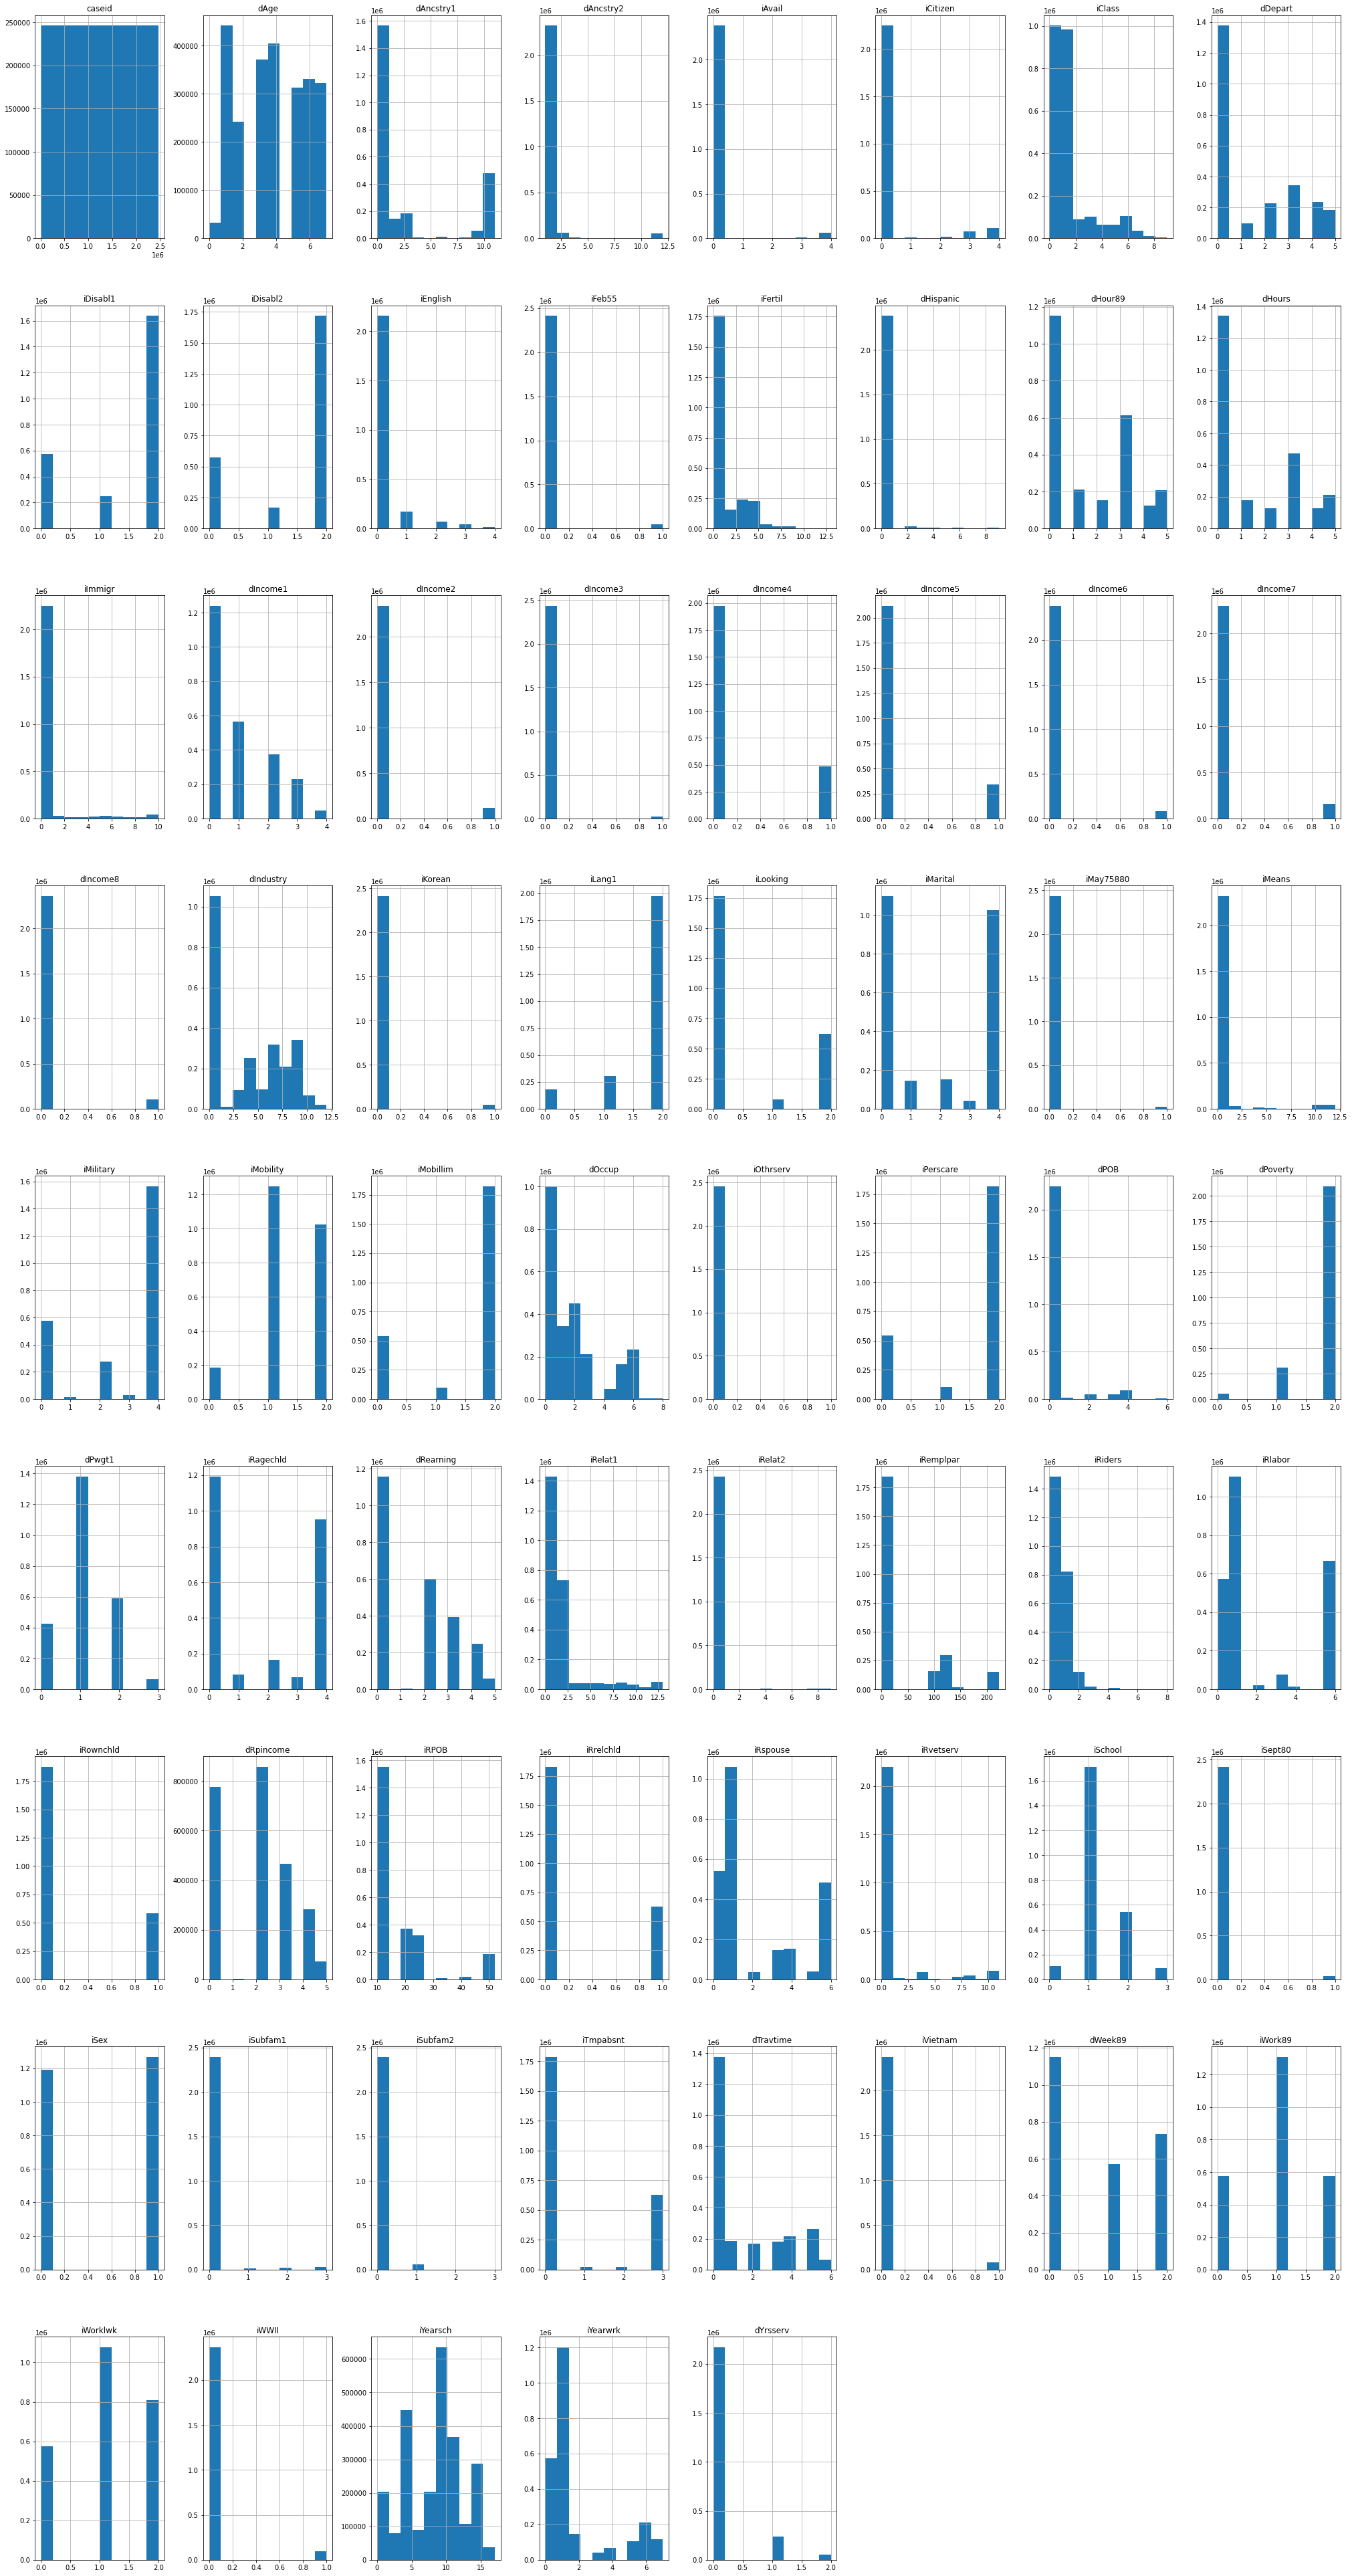

In [9]:
df_train.hist(figsize=(35, 70))
plt.show()

Widzimy, że mamy doczynienia z dużą liczbą zmiennych kategorycznych.

### Mapa korelacji pomiędzy naszymi zmiennymi

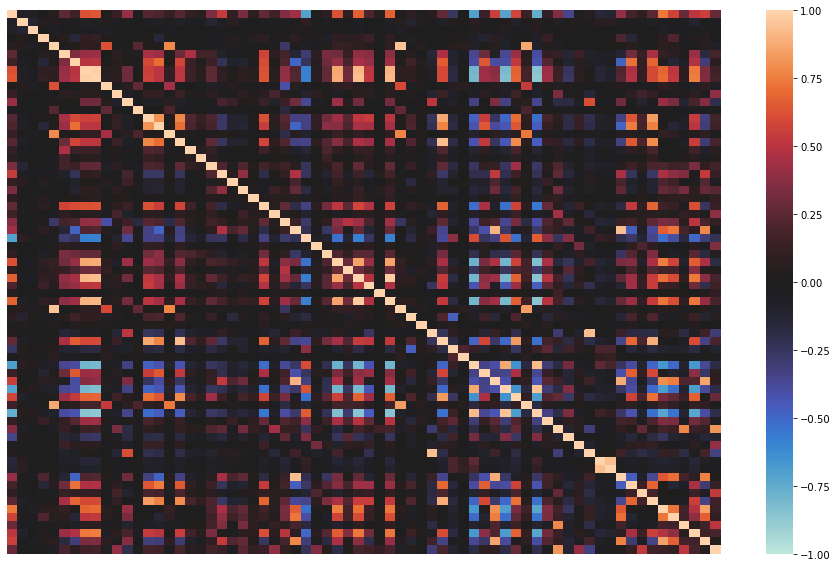

In [31]:
plt.figure(figsize=(16, 10))
sns.heatmap(data=df_train.corr(), vmin=-1, vmax=1, cmap='icefire', xticklabels=False, yticklabels=False)

### Preprocessing

### Usunięcie outlierów 

In [12]:
def outlier_clamper(df):
    min_quantile = 0.025
    max_quantile = 0.975
    min_max_dict = {}
    min_q = min_quantile
    max_q = max_quantile
    for column in df.columns:
        if not is_numeric_dtype(df[column]):
            continue
        min_max_dict[column] = (df[column].quantile(min_q), df[column].quantile(max_q))
    df_copy = df.copy()
    for column in df.columns:
        if not is_numeric_dtype(df[column]):
            continue
        min_v = min_max_dict[column][0]
        max_v = min_max_dict[column][1]
        df_copy.loc[df[column] < min_v, column] = min_v
        df_copy.loc[df[column] > max_v, column] = max_v
    return df_copy
    

In [13]:
df_train = outlier_clamper(df_train)

#### Standard Scaler

In [14]:
def standard_scale(df):
    features = list(df.columns)
    z_scored = StandardScaler()
    df[features] = z_scored.fit_transform(df[features])

In [15]:
standard_scale(df_train)

In [16]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
caseid,2458285.0,9.548399e-16,1.0,-1.651445,-0.869182,9.878701e-16,0.869182,1.651445
dAge,2458285.0,-3.281676e-15,1.0,-1.413337,-0.919979,6.673711e-02,1.053453,1.546811
dAncstry1,2458285.0,3.359642e-15,1.0,-0.816348,-0.568895,-5.688950e-01,-0.073990,1.905631
dAncstry2,2458285.0,2.099587e-14,1.0,-0.520394,-0.520394,-5.203937e-01,0.744953,4.540995
iAvail,2458285.0,-4.329962e-15,1.0,-0.179965,-0.179965,-1.799649e-01,-0.179965,5.781664
...,...,...,...,...,...,...,...,...
iWorklwk,2458285.0,-2.585666e-15,1.0,-1.472413,-0.127801,-1.278010e-01,1.216811,1.216811
iWWII,2458285.0,1.740862e-14,1.0,-0.199956,-0.199956,-1.999555e-01,-0.199956,5.001112
iYearsch,2458285.0,-6.259944e-15,1.0,-2.083369,-0.847177,3.890161e-01,0.636255,1.625209
iYearwrk,2458285.0,-6.047969e-15,1.0,-0.863294,-0.389111,-3.891106e-01,0.085073,2.455990


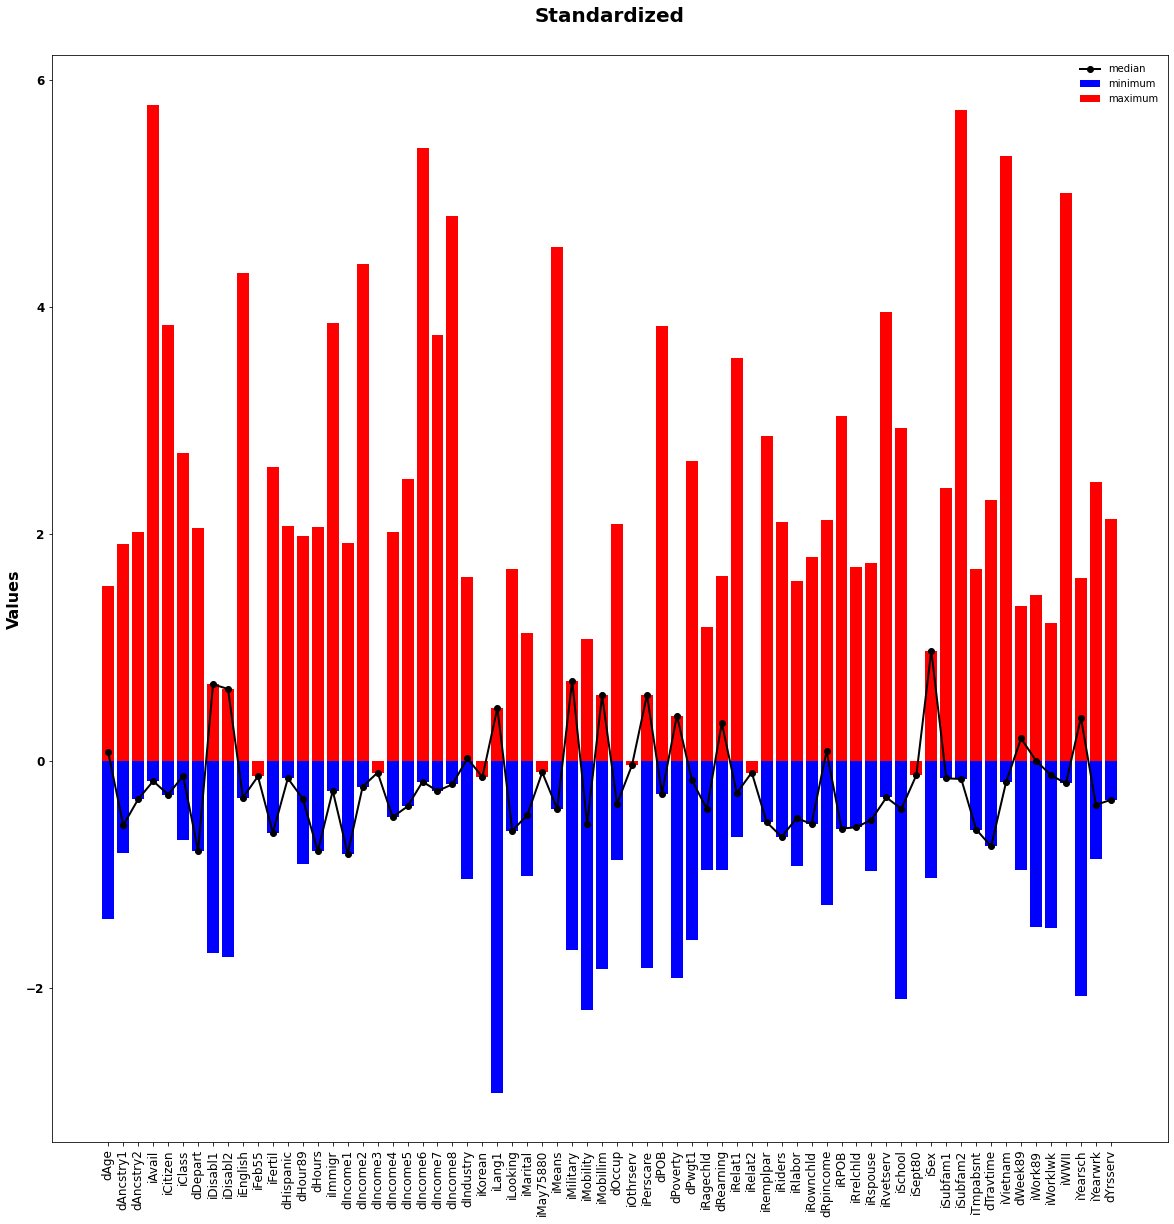

In [109]:
# Graph min, median & max values of each feature after they've been feature engineered
fig, ax = plt.subplots(figsize=(20, 20))
plt.plot(df_train.describe().columns.tolist(), df_train.describe().iloc[5,:], label="median", color="black", linewidth=2, marker="o")
plt.bar(df_train.describe().columns.tolist(), df_train.describe().iloc[3,:], label="minimum", color = 'blue')
plt.bar(df_train.describe().columns.tolist(), df_train.describe().iloc[-1,:], label="maximum", color = 'red')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, fontweight="bold")
plt.ylabel("Values", fontsize=16, fontweight="bold")
plt.title("Standardized", fontsize=20, fontweight="bold")
ax.title.set_position([.5, 1.025])
plt.legend(loc="best", frameon=False)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

# PCA

In [17]:
df_array = df_train.values
df_array

array([[-1.65144507,  0.5600952 , -0.81634759, ...,  0.63625462,
        -0.38911057, -0.36520418],
       [-1.65144507,  1.05345328, -0.56889503, ..., -0.84717653,
        -0.38911057, -0.36520418],
       [-1.65144507, -0.42662098, -0.56889503, ...,  0.3890161 ,
        -0.38911057, -0.36520418],
       ...,
       [ 1.65144507, -0.42662098, -0.07398991, ...,  0.63625462,
        -0.38911057, -0.36520418],
       [ 1.65144507,  1.05345328, -0.81634759, ...,  0.3890161 ,
        -0.38911057, -0.36520418],
       [ 1.65144507, -0.91997907, -0.07398991, ..., -0.84717653,
        -0.86329401, -0.36520418]])

In [18]:
pca = PCA(random_state=42)
pca.fit(df_array)

PCA(random_state=42)

In [19]:
df_pca = pd.DataFrame({
    "principal_component": range(1, df_array.shape[1]+1),
    "explained_variance": pca.explained_variance_ratio_,
    "cumsum_explained_variance": pca.explained_variance_ratio_.cumsum(),
})
df_pca.loc[-1] = 0
df_pca.sort_values(by="principal_component", inplace=True)

In [20]:
df_pca

,principal_component,explained_variance,cumsum_explained_variance
-1,0,0.000000e+00,0.000000
0,1,2.452063e-01,0.245206
1,2,1.387722e-01,0.383978
2,3,7.126239e-02,0.455241
3,4,5.781622e-02,0.513057
...,...,...,...
64,65,1.069913e-33,1.000000
65,66,1.069913e-33,1.000000
66,67,1.069913e-33,1.000000
67,68,1.069913e-33,1.000000


<ipython-input-22-dec71f3a764e>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["{:,.0f}".format(x) for x in ax.get_xticks()])
<ipython-input-22-dec71f3a764e>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:,.0%}".format(x) for x in ax.get_yticks()])


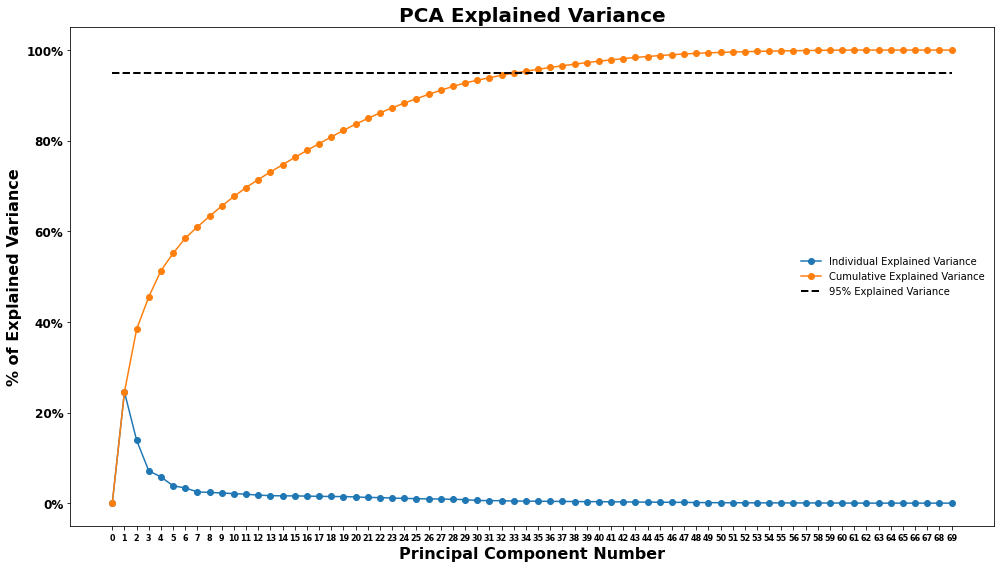

In [22]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.plot(df_pca["principal_component"], df_pca["explained_variance"], marker="o", label="Individual Explained Variance")
plt.plot(df_pca["principal_component"], df_pca["cumsum_explained_variance"], marker="o", label="Cumulative Explained Variance")
plt.plot(df_pca["principal_component"], [0.95] * len(df_pca), color="black", linewidth=2, linestyle="--", label="95% Explained Variance")
ax.set_xticklabels(["{:,.0f}".format(x) for x in ax.get_xticks()])
ax.set_yticklabels(["{:,.0%}".format(x) for x in ax.get_yticks()])
plt.title("PCA Explained Variance", fontsize=20, fontweight="bold")
ax.title.set_position([.5, 1.025])
plt.xticks(range(0,70), range(0,70), fontsize=8, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.xlabel("Principal Component Number", fontsize=16, fontweight="bold")
plt.ylabel("% of Explained Variance", fontsize=16, fontweight="bold")
plt.grid(False)
plt.legend(loc="best", frameon=False)
plt.tight_layout()
plt.show()

Do dalszych zabiegów będziemy korzystać ze zredukowanych danych.

Wybierzemy te zmienne, które w sumie wyjaśniają 95% wariancji w zbiorze danych (oczywiście najmniejszą liczbę takich zmiennych)

In [23]:
n_components_pca = int(df_pca["cumsum_explained_variance"].gt(0.95).idxmax())
print("# of Features Until 95% Variance is Reached:", n_components_pca)

# of Features Until 95% Variance is Reached: 33


In [24]:
pca = PCA(n_components=n_components_pca, random_state=42)
df_array = pca.fit_transform(df_array)

In [26]:
df_array.shape

(2458285, 33)

### KMeans

Wybór liczby klastrów

In [53]:
df_array_reduced = df_array[np.random.choice(df_array.shape[0], size=500000), :]

In [54]:
inertias = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_array_reduced)
    inertias.append(km.inertia_)

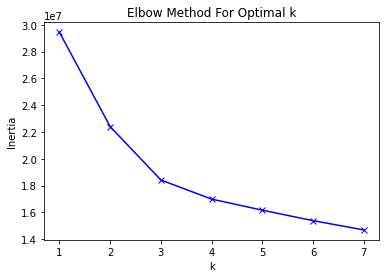

In [55]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

Wydaje się, że 3 klastry to odpowiednia liczba. Później inercja nie spada już tak gwałtownie i aby osiągnąć jej niską wartość musielibyśmy wykorzystać znacznie większą liczbę klastrów co z kolei grozi przeuczeniem.

Wstępna próba wizualizacji

In [56]:
km3 = KMeans(n_clusters=3)
km3.fit(df_array)

KMeans(n_clusters=3)

In [64]:
subset_idx = np.random.choice(df_array.shape[0], size=10000)
df_array_subset = df_array[subset_idx, :]
labels_subset = km3.labels_[subset_idx]

In [65]:
tsne = TSNE(n_components=2)
tsne_projection_2 = tsne.fit_transform(df_array_subset)

Tak prezentuje się projekcja bez kolorowania

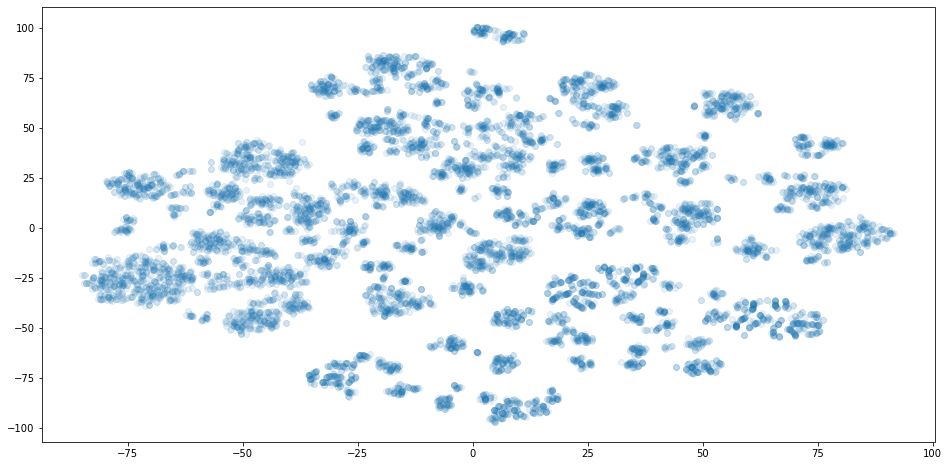

In [83]:
plt.figure(figsize=(16, 8))
plt.scatter(x=tsne_projection_2[:,0], y = tsne_projection_2[:,1], alpha=0.1)

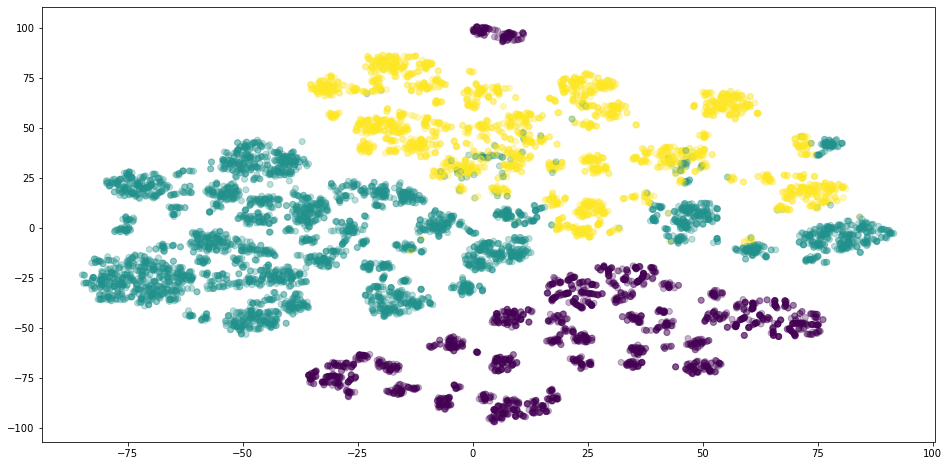

In [81]:
plt.figure(figsize=(16, 8))
plt.scatter(x=tsne_projection_2[:,0], y = tsne_projection_2[:,1], alpha=0.3, c = labels_subset)

A może jednak inna liczba klastrów?

In [102]:
km10 = KMeans(n_clusters=10)
km10.fit(df_array)

KMeans(n_clusters=10)

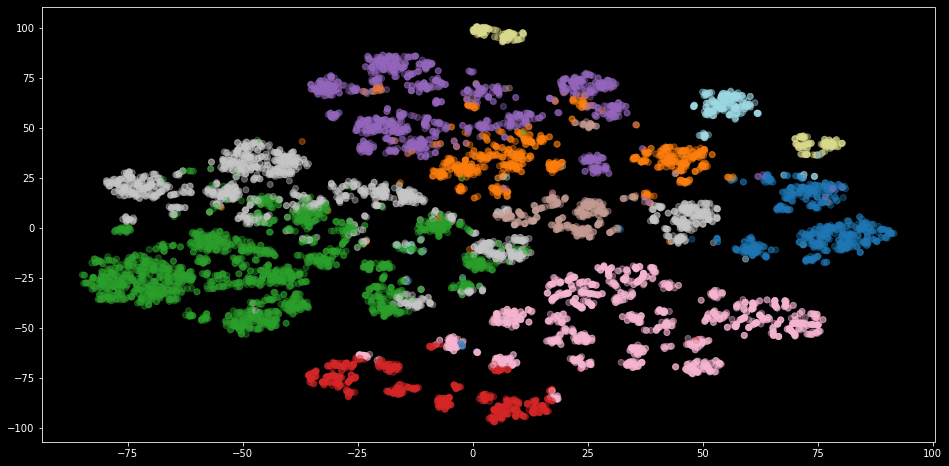

In [103]:
labels_subset = km10.labels_[subset_idx]
plt.figure(figsize=(16, 8))
plt.style.use('dark_background')
plt.scatter(x=tsne_projection_2[:,0], y = tsne_projection_2[:,1], alpha=0.4, c = labels_subset, cmap='tab20')

In [104]:
km20 = KMeans(n_clusters=20)
km20.fit(df_array)

KMeans(n_clusters=20)

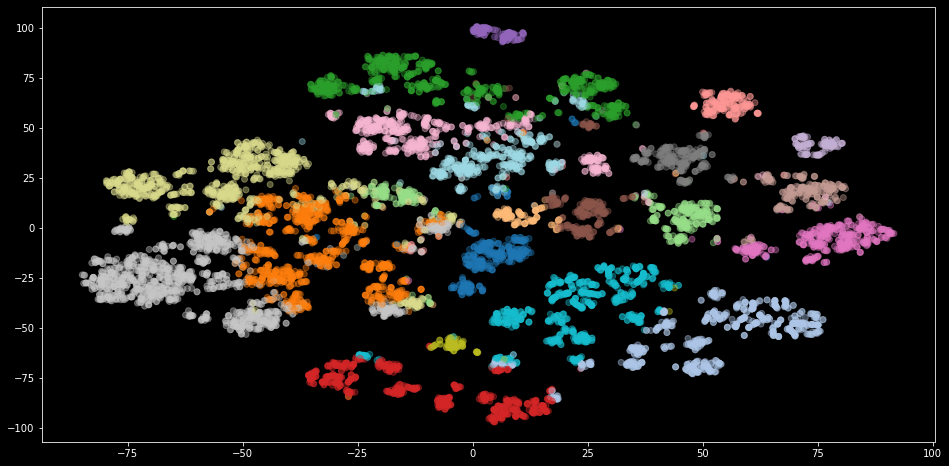

In [106]:
labels_subset = km20.labels_[subset_idx]
plt.figure(figsize=(16, 8))
plt.style.use('dark_background')
plt.scatter(x=tsne_projection_2[:,0], y = tsne_projection_2[:,1], alpha=0.4, c = labels_subset, cmap='tab20')

### Podsumowanie

Oceniając projekcje wizualnie wydaje się, że 3 klastry to jednak zbyt mało, aby oddać całą naturę zbioru danych.

Zwiększając liczbę klastrów do 10 lepiej udało nam pokolorować nasz "archipelag". 

Dla 20 klastrów niektóre wizualnie zbite wyspy są pokolorwane kilkoma kolorami. Bez dokładniejszych analiz trudno jest powiedzieć na ile jest to problem (bo redukujemy wymiary aż 16 krotnie).

Uważamy jednak, że jest to dobry punkt startowy dla naszego modelu.

**Co dalej?**
- Wytrenowanie innych modeli np. DBSCAN i porównanie ich ze sobą. 
- Wypróbowanie innych sposób wyboru liczby klastrów
- Próba wyjaśnienia/charakteryzacja klastrów